# Задание
### Преподаватель: 
Олег Булыгин, Даниил Корбут, Наталья Баданина

### Цель: 
изучить применение дерева решений в рамках задачи регрессии.

### Описание задания:
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

### Этапы работы:
- Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
- Проведите первичный анализ.  
a.Проверьте данные на пропуски. Удалите в случае обнаружения.  
b.*Нормализуйте один из признаков.
- Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
- Обучите модель регрессии на обучающем множестве.
- Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
- Обучите дерево решений на обучающем множестве.  
a. Повторите п. 5 для полученной модели.  
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке https://mljar.com/blog/visualize-decision-tree/.
- Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.  
a. Повторите п. 5 для полученной модели.
- Сформулируйте выводы по проделанной работе.  
a. Сравните точность двух моделей.  
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.


### Результат:
получены знания по работе с деревом решений
### Форма выполнения:
- Ссылка на Jupyter Notebook, загруженный на GitHub
- Ссылка на Google Colab
- Файл с расширением .ipynb

### Инструменты:
- Библиотека sklearn.datasets
- Jupyter Notebook/Google Colab
- GitHub
- библиотека sklearn.datasets https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html;
- модель регрессии https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html;
- дерево решений https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html.

### Срок выполнения: 
дедлайн приема решений на проверку

### *Рекомендации к выполнению:
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

## Решение
В предыдущем домашнем задании использовался этот же датасет, часть нового задания практически повторяет предыдущее задание, 
поэтому я копирую код предыдущего ДЗ и сохраню в нем общую часть.

In [2]:
# Грузим библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets as skl_data

### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).


In [3]:
data = skl_data.fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
print(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

### 2. Проведите первичный анализ.
a.Проверьте данные на пропуски. Удалите в случае обнаружения.  
b.*Нормализуйте один из признаков.

In [6]:
# Соберем датасет включая целевую колонку. Потом, перед обучением модели, выделим ее.
df = pd.DataFrame(data.data, columns=data.feature_names)
df[data.target_names] = pd.Series(data.target)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# Смотрим статистику по датасету
print(df.info())
df.describe()

# Признаков пропусков я не наблюдаю. 
# Во-первых совпадает количество строк по каждой колонке.
# во-вторых минимальные значения по каждой из колонок отличны от нуля.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Text(0.5, 1.0, 'Пропущенные значения')

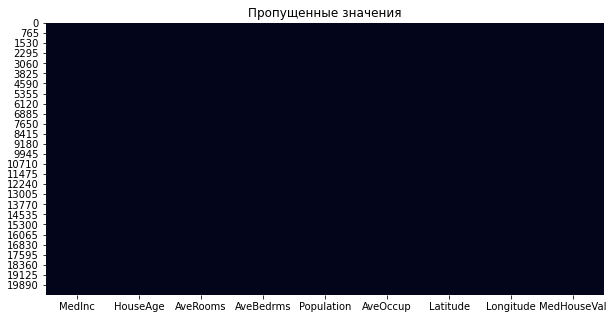

In [53]:
# Еще один способ посмотреть на пропущенные значения (если бы они были :) )
plt.rcParams['figure.figsize'] = (10.0, 5.0)
sns.heatmap(df.isnull(), cbar = False).set_title("Пропущенные значения")

In [9]:
# *Нормализуйте один из признаков.

# Небольшая функция в помощь
def norm_col(seria):
    seria -= seria.min()
    seria /= seria.max() - seria.min()
    return seria

# Нормализуем колонку HouseAge. В этой колонке, похоже, нет выбросов, поэтому нормализация уместна.
df['HouseAge'] = norm_col(df['HouseAge'])
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,0.541951,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,0.246776,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,0.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,0.333333,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,0.549020,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,0.705882,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,1.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
### 4. Обучите модель регрессии на обучающем множестве.
### 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score

In [10]:
# Функция вычисления score для выбранного метода оптимизации
# Функция и разделяет выборку, и для выбранной модели регрессии проводит обучение, и считает score (коэффициент детерминации)

def get_score(X, y, random_seed=42, model=None, print_metrics=False, test_size = 0.2):
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)  
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if print_metrics:
        print(f'Коэффициент детерминации {score}')
    return model, score

# Посчитаем метрики по дефолтному набору колонок "из коробки"
X1 = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y1 = df[['MedHouseVal']]
model1, score1 = get_score(X=X1, y=y1, print_metrics=True)

Коэффициент детерминации 0.5757877060324477


### Обучите дерево решений на обучающем множестве.
a. Повторите п. 5 для полученной модели.  
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке https://mljar.com/blog/visualize-decision-tree/.

In [12]:
model2, score2 = get_score(X=X1, y=y1, print_metrics=True, model=DecisionTreeRegressor(max_depth=7))
# 

Коэффициент детерминации 0.6515700686011479


[Text(416.7354910714286, 509.625, 'X[0] <= 5.086\nmse = 1.337\nsamples = 16512\nvalue = 2.072'),
 Text(209.04241071428572, 441.675, 'X[0] <= 3.074\nmse = 0.834\nsamples = 13101\nvalue = 1.74'),
 Text(106.28571428571429, 373.725, 'X[2] <= 4.314\nmse = 0.561\nsamples = 6268\nvalue = 1.358'),
 Text(53.142857142857146, 305.775, 'X[0] <= 2.215\nmse = 0.679\nsamples = 2624\nvalue = 1.626'),
 Text(26.571428571428573, 237.825, 'X[2] <= 3.422\nmse = 0.575\nsamples = 1404\nvalue = 1.377'),
 Text(13.285714285714286, 169.875, 'X[3] <= 1.027\nmse = 0.832\nsamples = 482\nvalue = 1.775'),
 Text(6.642857142857143, 101.92500000000001, 'X[7] <= -121.825\nmse = 0.459\nsamples = 167\nvalue = 1.436'),
 Text(3.3214285714285716, 33.97500000000002, 'mse = 1.416\nsamples = 26\nvalue = 1.777'),
 Text(9.964285714285715, 33.97500000000002, 'mse = 0.257\nsamples = 141\nvalue = 1.373'),
 Text(19.92857142857143, 101.92500000000001, 'X[6] <= 34.045\nmse = 0.937\nsamples = 315\nvalue = 1.954'),
 Text(16.60714285714285

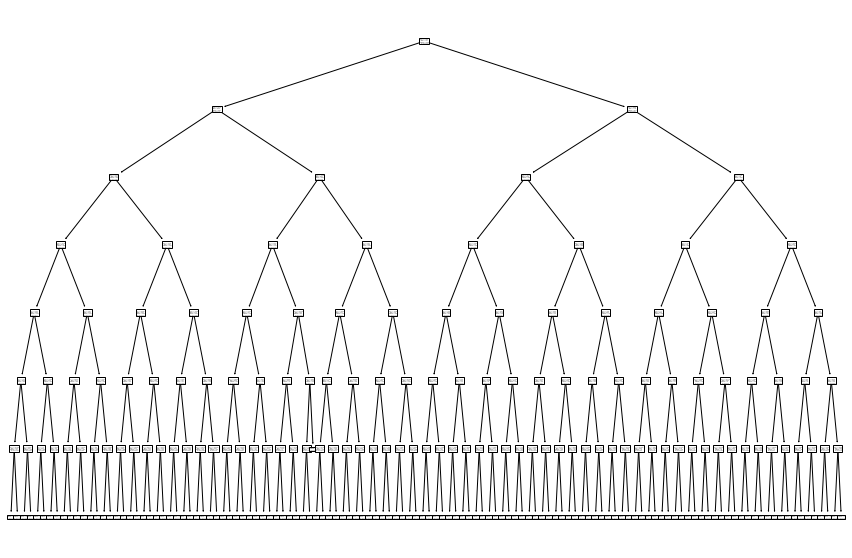

In [13]:
from sklearn import tree
tree.plot_tree(model2)

### Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.

Для глубины дерева 1 точность модели 0.2795112163463819
Для глубины дерева 2 точность модели 0.4244060273337801
Для глубины дерева 3 точность модели 0.5097629887358219
Для глубины дерева 4 точность модели 0.5540288505085005
Для глубины дерева 5 точность модели 0.5997321244428706
Для глубины дерева 6 точность модели 0.6205125146233951
Для глубины дерева 7 точность модели 0.651570068601148
Для глубины дерева 8 точность модели 0.6773955958507856
Для глубины дерева 9 точность модели 0.6868203645738965
Для глубины дерева 10 точность модели 0.6824646719943764
Для глубины дерева 11 точность модели 0.6736596194761283
Для глубины дерева 12 точность модели 0.668659597880334
Для глубины дерева 13 точность модели 0.6633004412732233
Для глубины дерева 14 точность модели 0.6520641955924188
Для глубины дерева 15 точность модели 0.6434188657865805
Для глубины дерева 16 точность модели 0.6379016313787071
Для глубины дерева 17 точность модели 0.629021722222973
Для глубины дерева 18 точность модели 0.622

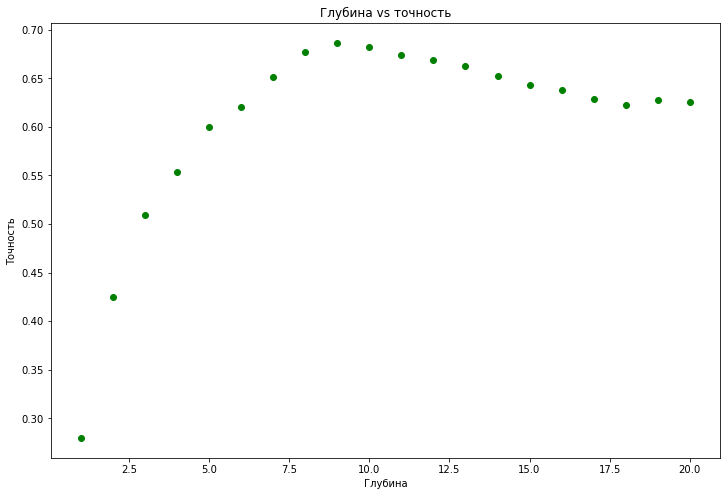

In [46]:
# Вначале попробую оптимизировать глубину дерева.
# Функция ниже позволяет для заданных пороговых значений глубины дерева (старт и максимум)
# вывести для каждой глубины дерева из диапазона полученное значение коэффициента детерминации.
# Функция также считает максимум для коэффициента детерминации и возвращает глубину дерева для этого максимума

def optimize_max_depth(start_depth=1, max_depth=20):
    max_score, best_depth = 0, 0
    scores, depths = [], []
    for cur_depth in range(start_depth, max_depth + 1):
        model_fn, score_fn = get_score(X=X1, y=y1, print_metrics=False, model=DecisionTreeRegressor(max_depth=cur_depth))    
        print (f'Для глубины дерева {cur_depth} точность модели {score_fn}')
        if score_fn > max_score:
            max_score = score_fn
            best_depth = cur_depth
        scores.append(score_fn)
        depths.append(cur_depth)
    return scores, depths, max_score, best_depth

scores, depths, max_score, best_depth = optimize_max_depth(start_depth=1, max_depth=20)

print (f'\nОптимальная глубина дерева {best_depth}, максимальная точность модели {max_score}')


fig, ax = plt.subplots()

ax.scatter(depths, scores, c = 'green')
ax.set_title('Глубина vs точность')   
ax.set_xlabel('Глубина')
ax.set_ylabel('Точность')
fig.set_figwidth(12)
fig.set_figheight(8)

plt.show()

In [45]:
# В этом блоке я немного "поигрался" с разными значениями параметра min_samples_leaf
model2, score2 = get_score(X=X1, y=y1, print_metrics=True, model=DecisionTreeRegressor(min_samples_leaf=200))

Коэффициент детерминации 0.6375651458048841


Для минимального количества листьев 1 точность модели 0.627945808602407
Для минимального количества листьев 2 точность модели 0.65749280839343
Для минимального количества листьев 3 точность модели 0.6697816488075845
Для минимального количества листьев 4 точность модели 0.6821471291236607
Для минимального количества листьев 5 точность модели 0.6967517621011402
Для минимального количества листьев 6 точность модели 0.7081157812499957
Для минимального количества листьев 7 точность модели 0.7127963843693059
Для минимального количества листьев 8 точность модели 0.7191916018306328
Для минимального количества листьев 9 точность модели 0.7228396624535238
Для минимального количества листьев 10 точность модели 0.722368057668366
Для минимального количества листьев 11 точность модели 0.7281154636892455
Для минимального количества листьев 12 точность модели 0.7258903983176165
Для минимального количества листьев 13 точность модели 0.7253486085113401
Для минимального количества листьев 14 точность мод

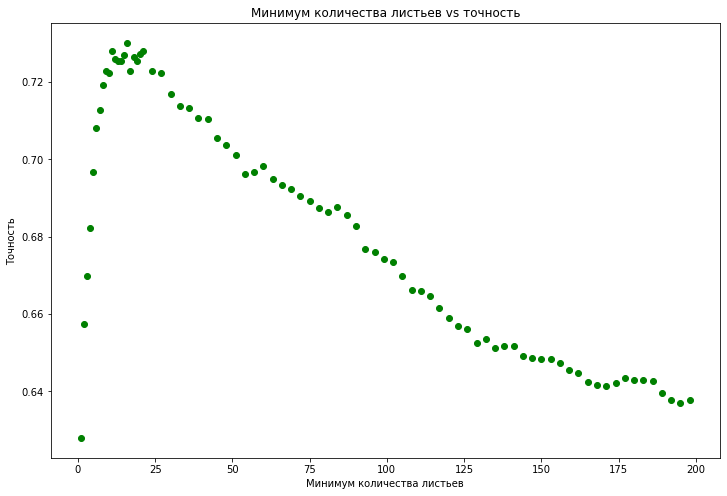

In [51]:
# Попробую сделать то же самое, что и с глубиной дерева, но теперь - с минимальным количеством "листьев" для дерева..
# Функция ниже позволяет для заданных пороговых значений min_samples_leaf (старт и максимум)
# вывести для каждого значения этого параметра из диапазона полученное значение коэффициента детерминации.
# Функция также считает максимум для коэффициента детерминации и min_samples_leaf для этого максимума

def optimize_min_samples_leaf(start_=1, max_=200):
    max_score, best_leaf = 0, 0
    scores, leafs = [], []
    for cur_leaf in range(start_, max_ + 1):
        if (cur_leaf > 20) & ((cur_leaf % 3) > 0):
            continue
        model_fn, score_fn = get_score(X=X1, y=y1, print_metrics=False, model=DecisionTreeRegressor(min_samples_leaf=cur_leaf))    
        print (f'Для минимального количества листьев {cur_leaf} точность модели {score_fn}')
        if score_fn > max_score:
            max_score = score_fn
            best_leaf = cur_leaf
        scores.append(score_fn)
        leafs.append(cur_leaf)
    return scores, leafs, max_score, best_leaf

scores, leafs, max_score, best_leaf = optimize_min_samples_leaf(start_=1, max_=200)

print (f'\nОптимальное количество листьев {best_leaf}, максимальная точность модели {max_score}')


fig, ax = plt.subplots()

ax.scatter(leafs, scores, c = 'green')
ax.set_title('Минимум количества листьев vs точность')   
ax.set_xlabel('Минимум количества листьев')
ax.set_ylabel('Точность')
fig.set_figwidth(12)
fig.set_figheight(8)

plt.show()

### Сформулируйте выводы по проделанной работе.
a. Сравните точность двух моделей.
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

Для модели линейной регрессии коэффициент детерминации для исходной выборки получился равным 0.5757877060324477

В свою очередь для модели регрессии с помощью решающего дерева в случае оптимизации глубины получился результат
Оптимальная глубина дерева 9, максимальная точность модели 0.6868203645738965

А при оптимизации параметра min_samples_leaf
Оптимальное количество листьев 16, максимальная точность модели 0.7301739721621952

Таким образом решающее дерево в данном случае, для данного датасета, оказалось решительно более эффективным.
Это, однако, не исключает того, что для новых данных, которые могли бы попасть в эту выборку, точность предсказаний могла бы ухудшиться, но в данном случае этого уже не проверишь.

Если я правильно понимаю теорию, чем больше размер обучающей выборки, тем больше вероятность более стабильной работы модели с решающим деревом.  

Вообще же, покопавшись в сети нашел вот такой набор плюсов - минусов LR (линейной регрессии) vs деревьев решений:
- Деревья решений поддерживают нелинейность, а LR поддерживает только линейные решения.
- Когда имеется большое количество объектов с меньшим количеством наборов данных (с низким уровнем шума), линейные регрессии могут превзойти деревья решений. 
- В общем случае деревья решений будут иметь лучшую среднюю точность.
- Для категориальных независимых переменных деревья решений лучше, чем линейная регрессия.
- Деревья решений обрабатывают коллинеарность лучше, чем LR.